<a href="https://colab.research.google.com/github/mihir70/Credit-Card-Prediction/blob/main/Default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Importing Data

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/UCI credit card/UCI_Credit_Card.csv')
data.shape

(30000, 25)

In [ ]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
data.columns


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [ ]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Checking for Data Imbalance

In [ ]:
data[data['default.payment.next.month']==1]['default.payment.next.month'].count()

6636

In [ ]:
data[data['default.payment.next.month']==0]['default.payment.next.month'].count()

23364

In [ ]:
data.groupby('SEX')['ID'].count()

SEX
1    11888
2    18112
Name: ID, dtype: int64

Counting no. of points in each catagory for columns 6 to 12

In [ ]:
col=data.columns
for i in range(6,12):
  print(data.groupby(col[i])['ID'].count())

PAY_0
-2     2759
-1     5686
 0    14737
 1     3688
 2     2667
 3      322
 4       76
 5       26
 6       11
 7        9
 8       19
Name: ID, dtype: int64
PAY_2
-2     3782
-1     6050
 0    15730
 1       28
 2     3927
 3      326
 4       99
 5       25
 6       12
 7       20
 8        1
Name: ID, dtype: int64
PAY_3
-2     4085
-1     5938
 0    15764
 1        4
 2     3819
 3      240
 4       76
 5       21
 6       23
 7       27
 8        3
Name: ID, dtype: int64
PAY_4
-2     4348
-1     5687
 0    16455
 1        2
 2     3159
 3      180
 4       69
 5       35
 6        5
 7       58
 8        2
Name: ID, dtype: int64
PAY_5
-2     4546
-1     5539
 0    16947
 2     2626
 3      178
 4       84
 5       17
 6        4
 7       58
 8        1
Name: ID, dtype: int64
PAY_6
-2     4895
-1     5740
 0    16286
 2     2766
 3      184
 4       49
 5       13
 6       19
 7       46
 8        2
Name: ID, dtype: int64


Merging the Categories which have very less data points into 1 Category

In [ ]:
col=data.columns
for i in range(6,12):
  data[col[i]].replace(to_replace=5, value=4, inplace=True)
  data[col[i]].replace(to_replace=6,value=4,inplace=True)
  data[col[i]].replace(to_replace=7,value=4,inplace=True)
  data[col[i]].replace(to_replace=8,value=4,inplace=True)
  print(data.groupby(col[i])['ID'].count())


PAY_0
-2     2759
-1     5686
 0    14737
 1     3688
 2     2667
 3      322
 4      141
Name: ID, dtype: int64
PAY_2
-2     3782
-1     6050
 0    15730
 1       28
 2     3927
 3      326
 4      157
Name: ID, dtype: int64
PAY_3
-2     4085
-1     5938
 0    15764
 1        4
 2     3819
 3      240
 4      150
Name: ID, dtype: int64
PAY_4
-2     4348
-1     5687
 0    16455
 1        2
 2     3159
 3      180
 4      169
Name: ID, dtype: int64
PAY_5
-2     4546
-1     5539
 0    16947
 2     2626
 3      178
 4      164
Name: ID, dtype: int64
PAY_6
-2     4895
-1     5740
 0    16286
 2     2766
 3      184
 4      129
Name: ID, dtype: int64


In [ ]:
for i in range(8,10):
  data[col[i]].replace(to_replace=1,value=4,inplace=True)

In [ ]:
col=data.columns
for i in range(6,12):
  print(data.groupby(col[i])['ID'].count())

PAY_0
-2     2759
-1     5686
 0    14737
 1     3688
 2     2667
 3      322
 4      141
Name: ID, dtype: int64
PAY_2
-2     3782
-1     6050
 0    15730
 1       28
 2     3927
 3      326
 4      157
Name: ID, dtype: int64
PAY_3
-2     4085
-1     5938
 0    15764
 2     3819
 3      240
 4      154
Name: ID, dtype: int64
PAY_4
-2     4348
-1     5687
 0    16455
 2     3159
 3      180
 4      171
Name: ID, dtype: int64
PAY_5
-2     4546
-1     5539
 0    16947
 2     2626
 3      178
 4      164
Name: ID, dtype: int64
PAY_6
-2     4895
-1     5740
 0    16286
 2     2766
 3      184
 4      129
Name: ID, dtype: int64


Histogram for target variable

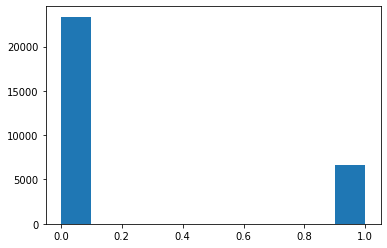

In [ ]:
fig,ax=plt.subplots()
ax.hist(data['default.payment.next.month'])
plt.show()

In [ ]:
data_0=data[data['default.payment.next.month']==0]
data_1=data[data['default.payment.next.month']==1]


Data Analysis

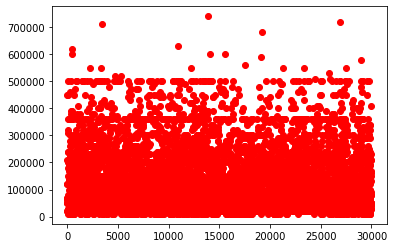

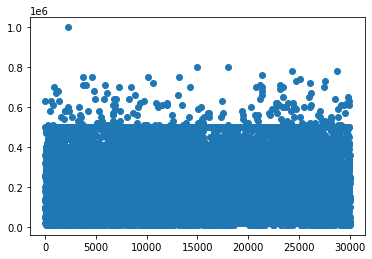

In [ ]:
fig,ax=plt.subplots()
ax.scatter(data_1.index,data_1['LIMIT_BAL'],c='r')
plt.show()
fig,ax=plt.subplots()
ax.scatter(data_0.index,data_0['LIMIT_BAL'],c='b')
plt.show()

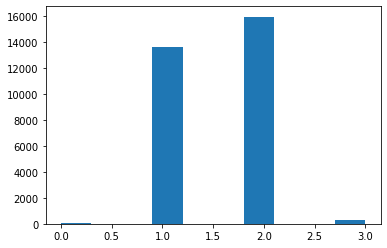

In [ ]:
fig,ax=plt.subplots()
ax.hist(data['MARRIAGE'])
plt.show()


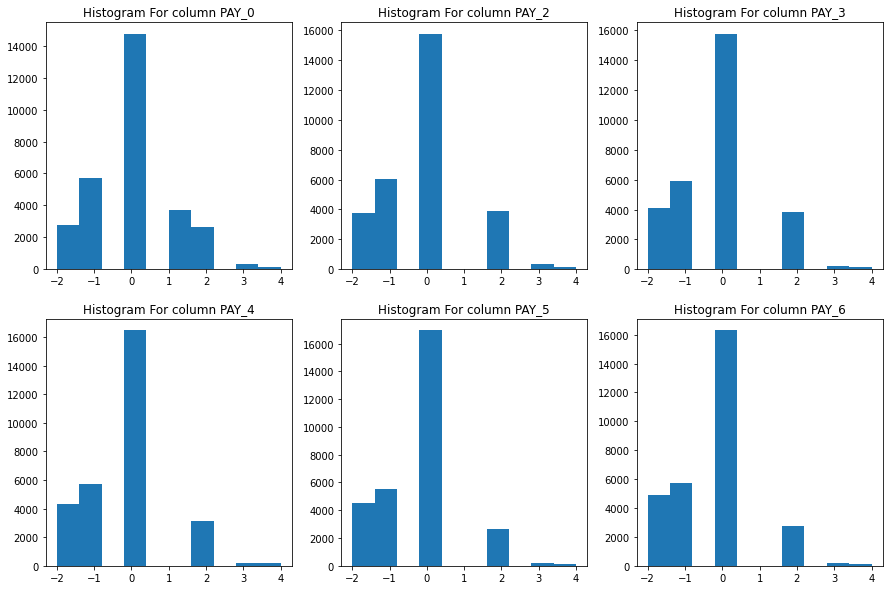

In [ ]:
col=data.columns
fig,ax=plt.subplots(2,3)
fig.set_size_inches(15,10)
for i in range(6,9):
  ax[0][i-6].hist(data[col[i]])
  ax[0][i-6].set_title("Histogram For column "+str(col[i]))
for i in range(9,12):
  ax[1][i-9].hist(data[col[i]])
  ax[1][i-9].set_title("Histogram For column "+str(col[i]))
plt.show()

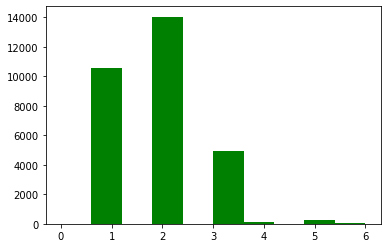

In [ ]:
fig,ax=plt.subplots()
ax.hist(data['EDUCATION'],color='g')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


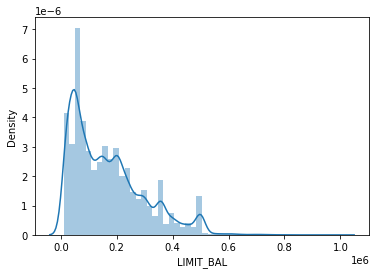

In [ ]:
sns.distplot(data['LIMIT_BAL'])

In [ ]:
data['LIMIT_BAL']=np.log(data['LIMIT_BAL'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


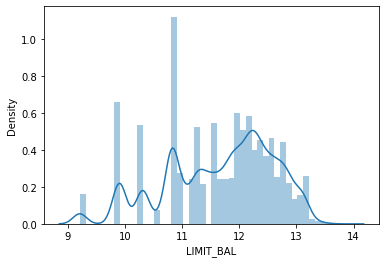

In [ ]:
sns.distplot(data['LIMIT_BAL'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


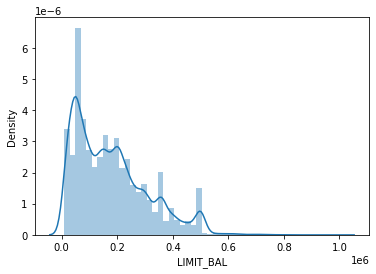

In [ ]:
bal_0=data_0['LIMIT_BAL']
sns.distplot(bal_0)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


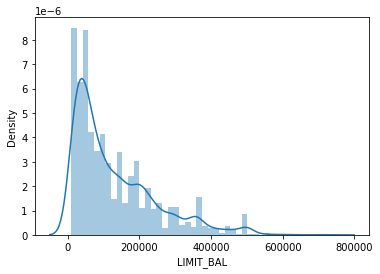

In [ ]:
bal_1=data_1['LIMIT_BAL']
sns.distplot(bal_1)

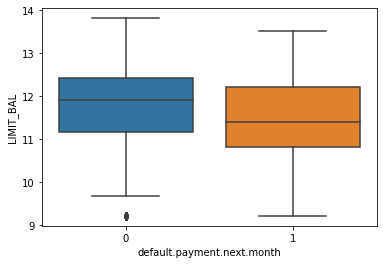

In [ ]:
sns.boxplot(x=data['default.payment.next.month'],y=data['LIMIT_BAL'])

In [ ]:
#data=data[data['LIMIT_BAL']<900000]
data.shape

(30000, 25)

In [ ]:
#data['LIMIT_BAL']=np.log(data['LIMIT_BAL'])
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,9.903488,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,11.695247,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,11.407565,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,10.819778,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,10.819778,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


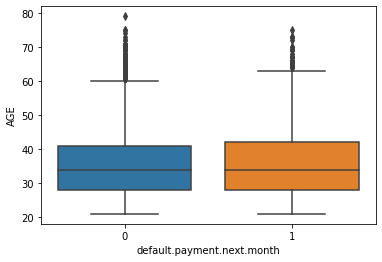

In [ ]:
sns.boxplot(x=data['default.payment.next.month'],y=data['AGE'])

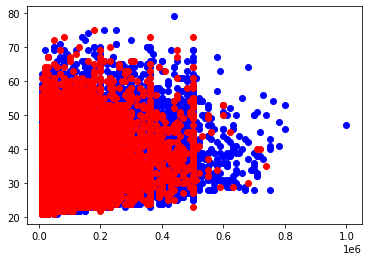

In [ ]:
fig,ax=plt.subplots()
ax.scatter(data_0['LIMIT_BAL'],data_0['AGE'],c='b')
ax.scatter(data_1['LIMIT_BAL'],data_1['AGE'],c='r')
plt.show()

In [ ]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,9.903488,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,11.695247,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,11.407565,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,10.819778,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,10.819778,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


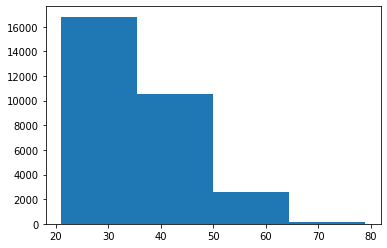

In [ ]:
fig,ax=plt.subplots()
ax.hist(data['AGE'],bins=4)
plt.show()

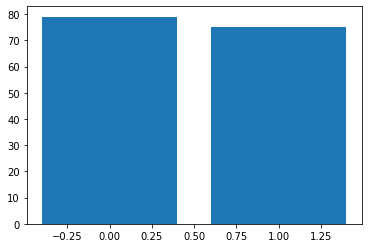

In [ ]:
fig,ax=plt.subplots()
ax.bar(data['default.payment.next.month'],data['AGE'])
plt.show()


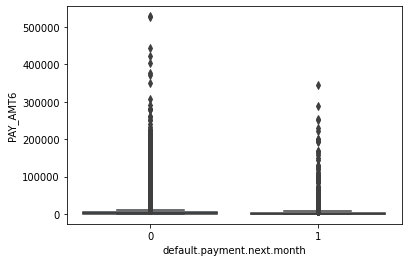

In [ ]:
fig,ax=plt.subplots()
sns.boxplot(y=data['PAY_AMT6'],x=data['default.payment.next.month'])
plt.show()

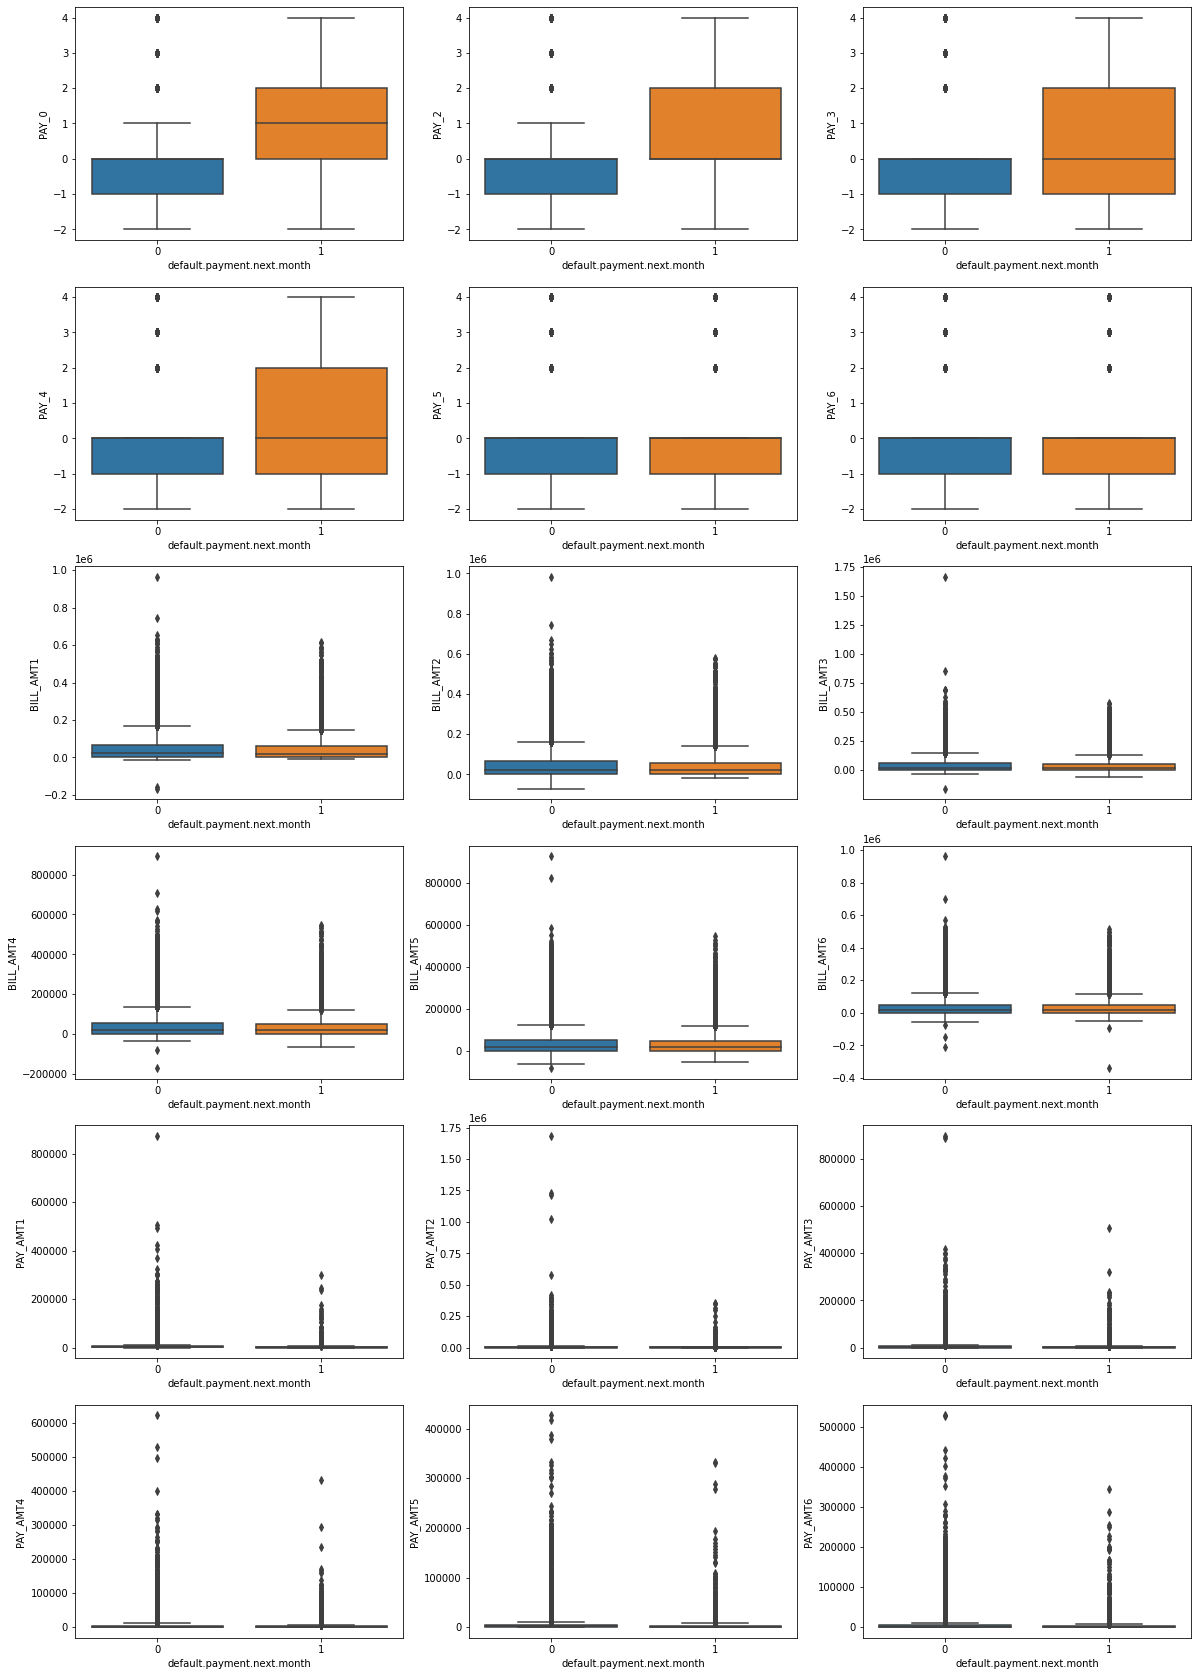

In [ ]:
lis=list(data.columns)
lis=lis[6:24]
fig,ax=plt.subplots(6,3,figsize=(20,30))
for i in range(6):
  for j in range(3):
    sns.boxplot(ax=ax[i][j],x=data['default.payment.next.month'],y=data[lis[3*i+j]])
plt.show()


In [ ]:
lis=list(data.columns)
print(lis)

['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month']


Standardisation and Normalisation

In [ ]:
lis=lis[12:24]
for i in range(12):
  data[lis[i]]=(data[lis[i]]-data[lis[i]].mean())/data[lis[i]].std()#standardization
  data[lis[i]]=(data[lis[i]]-data[lis[i]].min())/(data[lis[i]].max()-data[lis[i]].min()) #normalization

Checking for NaN values

In [ ]:
data.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [ ]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,9.903488,2,2,1,24,2,2,-1,-1,-2,-2,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000,1
1,2,11.695247,2,2,2,26,-1,2,0,0,0,2,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783,1
2,3,11.407565,2,2,2,34,0,0,0,0,0,0,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458,0
3,4,10.819778,2,2,1,37,0,0,0,0,0,0,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892,0
4,5,10.819778,1,2,1,57,-1,0,-1,0,0,0,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284,0


Making DataFtame for all Models using Class Weights

In [ ]:
MODELS_WTS=pd.DataFrame()
idx=0

#to maintain the index for the MODELS dataframe

In [ ]:
np.unique(data['MARRIAGE'])

array([0, 1, 2, 3])

Splitting Dataset for all columns

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(data.iloc[:,1:24],data.iloc[:,24],test_size=0.3)

In [ ]:
xtrain.shape
ytrain.shape

(21000,)

Defining a Function to calculate the accuracy metrics

In [ ]:
from sklearn.metrics import f1_score,roc_auc_score,precision_score,recall_score,accuracy_score
from sklearn.metrics import confusion_matrix
def scores(pred,ytest):
  roc=roc_auc_score(ytest, pred)
  acc = accuracy_score(ytest, pred)
  prec = precision_score(ytest, pred)
  rec = recall_score(ytest, pred)
  f1=f1_score(pred,ytest)
  print('Accuracy is: ',acc)
  print('Precision Score is: ',prec)
  print('Recall Score is: ',rec)
  print('F1 Score is: ',f1)
  cm = confusion_matrix(ytest, pred)
  sns.heatmap(cm, cmap="Blues", annot=True)
  return acc,prec,rec,f1

Function for plotting roc curve

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
def plotroc(model,xtest,ytest):
  probs = model.predict_proba(xtest)
  preds = probs[:,1]
  fpr, tpr, threshold = metrics.roc_curve(ytest, preds)
  roc_auc = metrics.auc(fpr, tpr)
  #print(probs)

  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

WITH CLASS WEIGHTS

LOGISTIC

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(class_weight='balanced',max_iter=10000)
model.fit(xtrain,ytrain)
trainsc=model.score(xtrain,ytrain)
print(model.score(xtrain,ytrain))
pred=model.predict(xtest)

0.6971904761904761


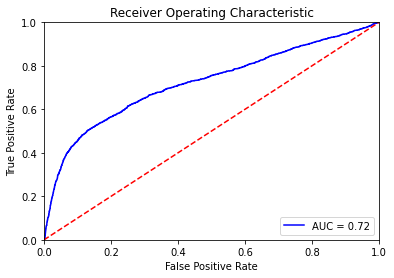

In [ ]:
plotroc(model,xtest,ytest)

Accuracy is:  0.7002222222222222
Precision Score is:  0.39452644526445263
Recall Score is:  0.6376739562624254
F1 Score is:  0.4874620060790274


,Name,With All Features,Training Accuracy,Test Accuracy,Precision Score,Recall Score,F1 Score
0,Logistic,Yes,0.69719,0.700222,0.394526,0.637674,0.487462


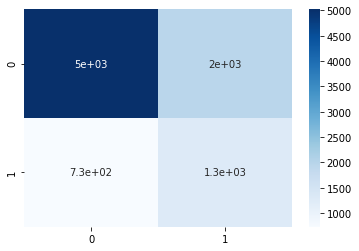

In [ ]:
acc,prec,rec,f1=scores(pred,ytest)
MODELS_WTS.loc[idx,'Name']='Logistic'
MODELS_WTS.loc[idx,'With All Features']='Yes'
MODELS_WTS.loc[idx,'Training Accuracy']=trainsc
MODELS_WTS.loc[idx,'Test Accuracy']=acc
MODELS_WTS.loc[idx,'Precision Score']=prec
MODELS_WTS.loc[idx,'Recall Score']=rec
MODELS_WTS.loc[idx,'F1 Score']=f1
idx+=1
MODELS_WTS

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(class_weight='balanced',min_samples_split=5)
dt.fit(xtrain,ytrain)
trainsc=dt.score(xtrain,ytrain)
print(trainsc)
pred=dt.predict(xtest)

0.9674285714285714


Accuracy is:  0.7161111111111111
Precision Score is:  0.3815961622328827
Recall Score is:  0.43489065606361826
F1 Score is:  0.4065040650406504


,Name,With All Features,Training Accuracy,Test Accuracy,Precision Score,Recall Score,F1 Score
0,Logistic,Yes,0.697190,0.700222,0.394526,0.637674,0.487462
1,Decision Tree,Yes,0.967429,0.716111,0.381596,0.434891,0.406504


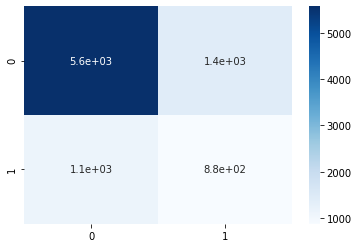

In [ ]:
acc,prec,rec,f1=scores(pred,ytest)
MODELS_WTS.loc[idx,'Name']='Decision Tree'
MODELS_WTS.loc[idx,'With All Features']='Yes'
MODELS_WTS.loc[idx,'Training Accuracy']=trainsc
MODELS_WTS.loc[idx,'Test Accuracy']=acc
MODELS_WTS.loc[idx,'Precision Score']=prec
MODELS_WTS.loc[idx,'Recall Score']=rec
MODELS_WTS.loc[idx,'F1 Score']=f1
idx+=1
MODELS_WTS

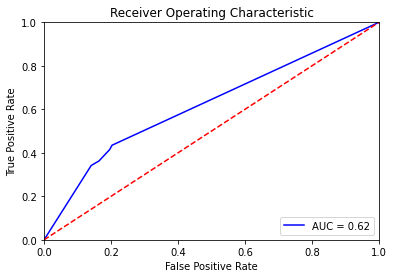

In [ ]:
plotroc(dt,xtest,ytest)

SVM

In [ ]:
from sklearn.svm import SVC
svm=SVC(class_weight='balanced',C=5,kernel='poly',probability=True)
svm.fit(xtrain,ytrain)
trainsc=svm.score(xtrain,ytrain)
print(svm.score(xtrain,ytrain))
pred=svm.predict(xtest)

0.7882857142857143


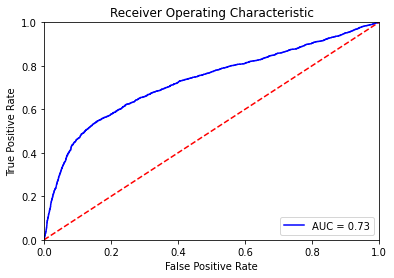

In [ ]:
plotroc(svm,xtest,ytest)

Accuracy is:  0.785
Precision Score is:  0.5189748644652539
Recall Score is:  0.5233598409542743
F1 Score is:  0.5211581291759465


,Name,With All Features,Training Accuracy,Test Accuracy,Precision Score,Recall Score,F1 Score
0,Logistic,Yes,0.697190,0.700222,0.394526,0.637674,0.487462
1,Decision Tree,Yes,0.967429,0.716111,0.381596,0.434891,0.406504
2,SVM,Yes,0.788286,0.785000,0.518975,0.523360,0.521158


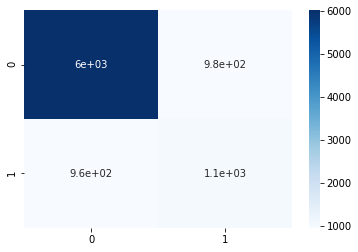

In [ ]:
acc,prec,rec,f1=scores(pred,ytest)
MODELS_WTS.loc[idx,'Name']='SVM'
MODELS_WTS.loc[idx,'With All Features']='Yes'
MODELS_WTS.loc[idx,'Training Accuracy']=trainsc
MODELS_WTS.loc[idx,'Test Accuracy']=acc
MODELS_WTS.loc[idx,'Precision Score']=prec
MODELS_WTS.loc[idx,'Recall Score']=rec
MODELS_WTS.loc[idx,'F1 Score']=f1
idx+=1
MODELS_WTS

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=50,class_weight='balanced',max_depth=20)
forest.fit(xtrain,ytrain)
trainsc=forest.score(xtrain,ytrain)
pred=forest.predict(xtest)
print(trainsc)

0.9719047619047619


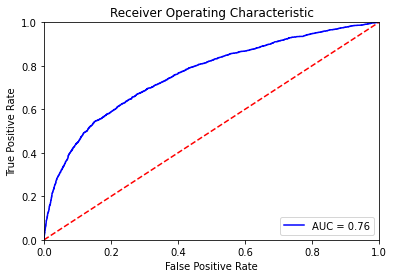

In [ ]:
plotroc(forest,xtest,ytest)

Accuracy is:  0.8052222222222222
Precision Score is:  0.5944566010211525
Recall Score is:  0.40506958250497016
F1 Score is:  0.4818208690511381


,Name,With All Features,Training Accuracy,Test Accuracy,Precision Score,Recall Score,F1 Score
0,Logistic,Yes,0.697190,0.700222,0.394526,0.637674,0.487462
1,Decision Tree,Yes,0.967429,0.716111,0.381596,0.434891,0.406504
2,SVM,Yes,0.788286,0.785000,0.518975,0.523360,0.521158
3,Random Forest,Yes,0.971905,0.805222,0.594457,0.405070,0.481821


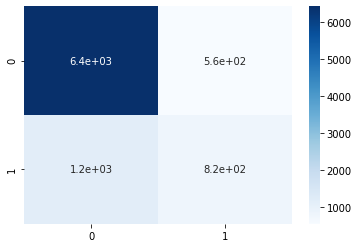

In [ ]:
acc,prec,rec,f1=scores(pred,ytest)
MODELS_WTS.loc[idx,'Name']='Random Forest'
MODELS_WTS.loc[idx,'With All Features']='Yes'
MODELS_WTS.loc[idx,'Training Accuracy']=trainsc
MODELS_WTS.loc[idx,'Test Accuracy']=acc
MODELS_WTS.loc[idx,'Precision Score']=prec
MODELS_WTS.loc[idx,'Recall Score']=rec
MODELS_WTS.loc[idx,'F1 Score']=f1
idx+=1
MODELS_WTS

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_dt=AdaBoostClassifier()
ada_dt.fit(xtrain,ytrain)
trainsc=ada_dt.score(xtrain,ytrain)
print(ada_dt.score(xtrain,ytrain))
pred=ada_dt.predict(xtest)

0.8206666666666667


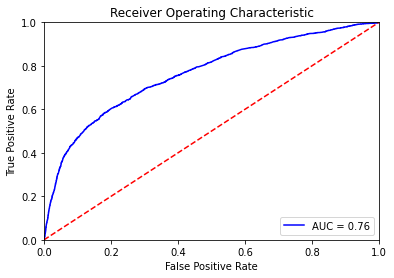

In [ ]:
plotroc(ada_dt,xtest,ytest)

Accuracy is:  0.8142222222222222
Precision Score is:  0.6686507936507936
Recall Score is:  0.3349900596421471
F1 Score is:  0.44635761589403977


,Name,With All Features,Training Accuracy,Test Accuracy,Precision Score,Recall Score,F1 Score
0,Logistic,Yes,0.697190,0.700222,0.394526,0.637674,0.487462
1,Decision Tree,Yes,0.967429,0.716111,0.381596,0.434891,0.406504
2,SVM,Yes,0.788286,0.785000,0.518975,0.523360,0.521158
3,Random Forest,Yes,0.971905,0.805222,0.594457,0.405070,0.481821
4,Adaboost (Decision tree),Yes,0.820667,0.814222,0.668651,0.334990,0.446358


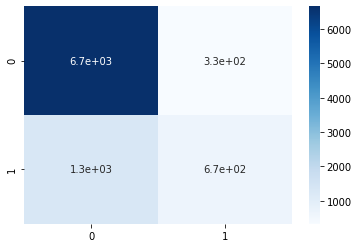

In [ ]:
acc,prec,rec,f1=scores(pred,ytest)
MODELS_WTS.loc[idx,'Name']='Adaboost (Decision tree)'
MODELS_WTS.loc[idx,'With All Features']='Yes'
MODELS_WTS.loc[idx,'Training Accuracy']=trainsc
MODELS_WTS.loc[idx,'Test Accuracy']=acc
MODELS_WTS.loc[idx,'Precision Score']=prec
MODELS_WTS.loc[idx,'Recall Score']=rec
MODELS_WTS.loc[idx,'F1 Score']=f1
idx+=1
MODELS_WTS

In [ ]:
xtrain.shape[1]

23

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Dropout
model = Sequential()
model.add(Dense(32, input_dim=xtrain.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                768       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 19,521
Trainable params: 19,521
Non-trainable params: 0
____________________________________________________

In [ ]:
history=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=50)

Epoch 1/50
657/657 [==============================] - 2s 3ms/step - loss: 0.4839 - accuracy: 0.8010 - val_loss: 0.4554 - val_accuracy: 0.8103
Epoch 2/50
657/657 [==============================] - 2s 2ms/step - loss: 0.4546 - accuracy: 0.8153 - val_loss: 0.4502 - val_accuracy: 0.8152
Epoch 3/50
657/657 [==============================] - 2s 3ms/step - loss: 0.4498 - accuracy: 0.8191 - val_loss: 0.4461 - val_accuracy: 0.8154
Epoch 4/50
657/657 [==============================] - 2s 2ms/step - loss: 0.4458 - accuracy: 0.8205 - val_loss: 0.4490 - val_accuracy: 0.8157
Epoch 5/50
657/657 [==============================] - 2s 2ms/step - loss: 0.4457 - accuracy: 0.8211 - val_loss: 0.4490 - val_accuracy: 0.8151
Epoch 6/50
657/657 [==============================] - 2s 2ms/step - loss: 0.4424 - accuracy: 0.8203 - val_loss: 0.4460 - val_accuracy: 0.8164
Epoch 7/50
657/657 [==============================] - 2s 2ms/step - loss: 0.4417 - accuracy: 0.8209 - val_loss: 0.4461 - val_accuracy: 0.8173
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


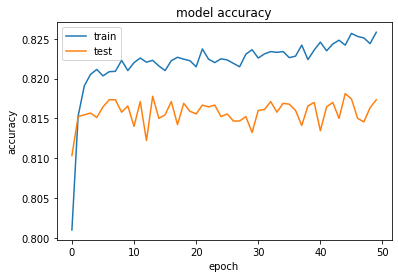

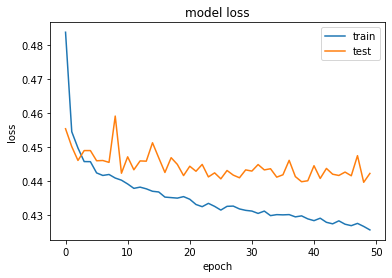

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [ ]:

pred=model.predict(xtest)
print(type(pred))

<class 'numpy.ndarray'>


In [ ]:
type(ytest)

pandas.core.series.Series

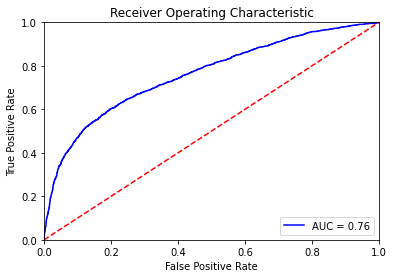

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(ytest, pred)
roc_auc = metrics.auc(fpr, tpr)
  #print(probs)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Accuracy is:  0.8173333333333334
Precision Score is:  0.684
Recall Score is:  0.3399602385685885
F1 Score is:  0.4541832669322709


,Name,With All Features,Training Accuracy,Test Accuracy,Precision Score,Recall Score,F1 Score
0,Logistic,Yes,0.697190,0.700222,0.394526,0.637674,0.487462
1,Decision Tree,Yes,0.967429,0.716111,0.381596,0.434891,0.406504
2,SVM,Yes,0.788286,0.785000,0.518975,0.523360,0.521158
3,Random Forest,Yes,0.971905,0.805222,0.594457,0.405070,0.481821
4,Adaboost (Decision tree),Yes,0.820667,0.814222,0.668651,0.334990,0.446358
5,ANN,Yes,0.820667,0.817333,0.684000,0.339960,0.454183


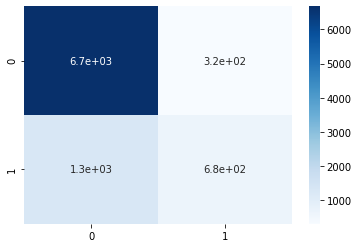

In [ ]:
pred1=[1 if i>0.5 else 0 for i in pred]
acc,prec,rec,f1=scores(pred1,ytest)
MODELS_WTS.loc[idx,'Name']='ANN'
MODELS_WTS.loc[idx,'With All Features']='Yes'
MODELS_WTS.loc[idx,'Training Accuracy']=trainsc
MODELS_WTS.loc[idx,'Test Accuracy']=acc
MODELS_WTS.loc[idx,'Precision Score']=prec
MODELS_WTS.loc[idx,'Recall Score']=rec
MODELS_WTS.loc[idx,'F1 Score']=f1
idx+=1
MODELS_WTS

WITH PARTIAL FEATURES

In [ ]:
feature=['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE','PAY_AMT1', 'PAY_AMT2','PAY_AMT3','PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
xtr,xte,ytr,yte=train_test_split(data[feature],data['default.payment.next.month'],test_size=0.3)

In [ ]:

ytr.shape

(21000,)

In [ ]:
val,counts=(np.unique(ytr,return_counts=True))
print(val[0],counts[0])

0 16375


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=40,class_weight='balanced',min_samples_split=4)
forest.fit(xtr,ytr)
trainsc=forest.score(xtr,ytr)
pred=forest.predict(xte)
print(trainsc)

0.9940952380952381


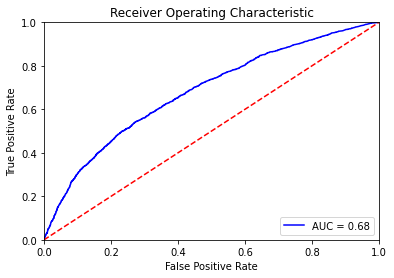

In [ ]:
plotroc(forest,xte,yte)

Accuracy is:  0.7754444444444445
Precision Score is:  0.4935897435897436
Recall Score is:  0.1914470412729985
F1 Score is:  0.27588677893228236


,Name,With All Features,Training Accuracy,Test Accuracy,Precision Score,Recall Score,F1 Score
0,Logistic,Yes,0.697190,0.700222,0.394526,0.637674,0.487462
1,Decision Tree,Yes,0.967429,0.716111,0.381596,0.434891,0.406504
2,SVM,Yes,0.788286,0.785000,0.518975,0.523360,0.521158
3,Random Forest,Yes,0.971905,0.805222,0.594457,0.405070,0.481821
4,Adaboost (Decision tree),Yes,0.820667,0.814222,0.668651,0.334990,0.446358
5,ANN,Yes,0.820667,0.817333,0.684000,0.339960,0.454183
6,Random Forest,No (Selected),0.994095,0.775444,0.493590,0.191447,0.275887


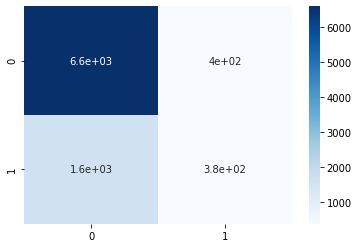

In [ ]:
acc,prec,rec,f1=scores(pred,yte)
MODELS_WTS.loc[idx,'Name']='Random Forest'
MODELS_WTS.loc[idx,'With All Features']='No (Selected)'
MODELS_WTS.loc[idx,'Training Accuracy']=trainsc
MODELS_WTS.loc[idx,'Test Accuracy']=acc
MODELS_WTS.loc[idx,'Precision Score']=prec
MODELS_WTS.loc[idx,'Recall Score']=rec
MODELS_WTS.loc[idx,'F1 Score']=f1
idx+=1
MODELS_WTS

Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(class_weight='balanced',max_iter=10000)
model.fit(xtr,ytr)
trainsc=model.score(xtr,ytr)
print(model.score(xtr,ytr))
pred=model.predict(xte)

0.6087142857142858


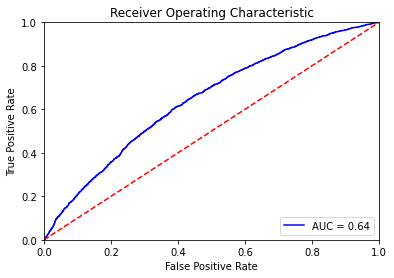

In [ ]:
plotroc(model,xte,yte)

Accuracy is:  0.6137777777777778
Precision Score is:  0.31018398548846854
Recall Score is:  0.5952262555942317
F1 Score is:  0.40783645655877343


,Name,With All Features,Training Accuracy,Test Accuracy,Precision Score,Recall Score,F1 Score
0,Logistic,Yes,0.697190,0.700222,0.394526,0.637674,0.487462
1,Decision Tree,Yes,0.967429,0.716111,0.381596,0.434891,0.406504
2,SVM,Yes,0.788286,0.785000,0.518975,0.523360,0.521158
3,Random Forest,Yes,0.971905,0.805222,0.594457,0.405070,0.481821
4,Adaboost (Decision tree),Yes,0.820667,0.814222,0.668651,0.334990,0.446358
5,ANN,Yes,0.820667,0.817333,0.684000,0.339960,0.454183
6,Random Forest,No (Selected),0.994095,0.775444,0.493590,0.191447,0.275887
7,Logistic,No (Selected),0.608714,0.613778,0.310184,0.595226,0.407836


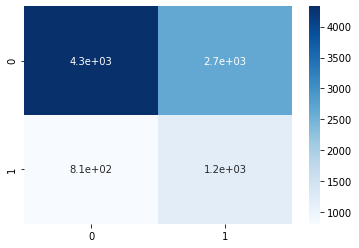

In [ ]:
acc,prec,rec,f1=scores(pred,yte)
MODELS_WTS.loc[idx,'Name']='Logistic'
MODELS_WTS.loc[idx,'With All Features']='No (Selected)'
MODELS_WTS.loc[idx,'Training Accuracy']=trainsc
MODELS_WTS.loc[idx,'Test Accuracy']=acc
MODELS_WTS.loc[idx,'Precision Score']=prec
MODELS_WTS.loc[idx,'Recall Score']=rec
MODELS_WTS.loc[idx,'F1 Score']=f1
idx+=1
MODELS_WTS

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(class_weight='balanced',max_depth=22)
dt.fit(xtr,ytr)
trainsc=dt.score(xtr,ytr)
print(trainsc)
pred=dt.predict(xte)

0.9221904761904762


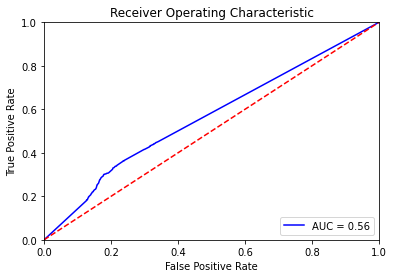

In [ ]:
plotroc(dt,xte,yte)

Accuracy is:  0.6721111111111111
Precision Score is:  0.30416666666666664
Recall Score is:  0.3630034808552959
F1 Score is:  0.330990705055543


,Name,With All Features,Training Accuracy,Test Accuracy,Precision Score,Recall Score,F1 Score
0,Logistic,Yes,0.697190,0.700222,0.394526,0.637674,0.487462
1,Decision Tree,Yes,0.967429,0.716111,0.381596,0.434891,0.406504
2,SVM,Yes,0.788286,0.785000,0.518975,0.523360,0.521158
3,Random Forest,Yes,0.971905,0.805222,0.594457,0.405070,0.481821
4,Adaboost (Decision tree),Yes,0.820667,0.814222,0.668651,0.334990,0.446358
5,ANN,Yes,0.820667,0.817333,0.684000,0.339960,0.454183
6,Random Forest,No (Selected),0.994095,0.775444,0.493590,0.191447,0.275887
7,Logistic,No (Selected),0.608714,0.613778,0.310184,0.595226,0.407836
8,Decision Tree,No (Selected),0.922190,0.672111,0.304167,0.363003,0.330991


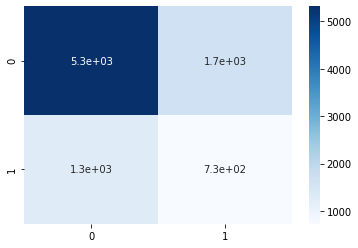

In [ ]:
acc,prec,rec,f1=scores(pred,yte)
MODELS_WTS.loc[idx,'Name']='Decision Tree'
MODELS_WTS.loc[idx,'With All Features']='No (Selected)'
MODELS_WTS.loc[idx,'Training Accuracy']=trainsc
MODELS_WTS.loc[idx,'Test Accuracy']=acc
MODELS_WTS.loc[idx,'Precision Score']=prec
MODELS_WTS.loc[idx,'Recall Score']=rec
MODELS_WTS.loc[idx,'F1 Score']=f1
idx+=1
MODELS_WTS

SVM

In [ ]:
from sklearn.svm import SVC
svm=SVC(class_weight='balanced',C=5,probability=True)
svm.fit(xtr,ytr)
trainsc=svm.score(xtr,ytr)
print(svm.score(xtr,ytr))
pred=svm.predict(xte)

0.6166666666666667


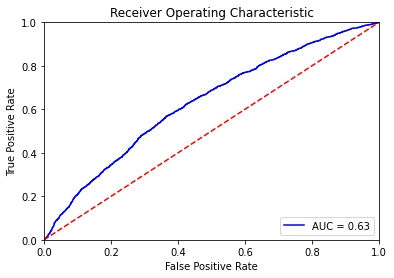

In [ ]:
plotroc(svm,xte,yte)

Accuracy is:  0.6207777777777778
Precision Score is:  0.30867903930131
Recall Score is:  0.5624067628045748
F1 Score is:  0.39859030837004406


,Name,With All Features,Training Accuracy,Test Accuracy,Precision Score,Recall Score,F1 Score
0,Logistic,Yes,0.697190,0.700222,0.394526,0.637674,0.487462
1,Decision Tree,Yes,0.967429,0.716111,0.381596,0.434891,0.406504
2,SVM,Yes,0.788286,0.785000,0.518975,0.523360,0.521158
3,Random Forest,Yes,0.971905,0.805222,0.594457,0.405070,0.481821
4,Adaboost (Decision tree),Yes,0.820667,0.814222,0.668651,0.334990,0.446358
5,ANN,Yes,0.820667,0.817333,0.684000,0.339960,0.454183
6,Random Forest,No (Selected),0.994095,0.775444,0.493590,0.191447,0.275887
7,Logistic,No (Selected),0.608714,0.613778,0.310184,0.595226,0.407836
8,Decision Tree,No (Selected),0.922190,0.672111,0.304167,0.363003,0.330991
9,SVM,No (Selected),0.616667,0.620778,0.308679,0.562407,0.398590


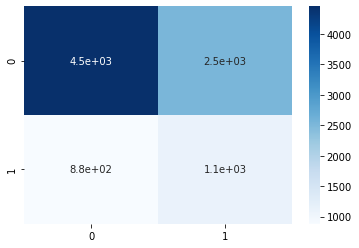

In [ ]:
acc,prec,rec,f1=scores(pred,yte)
MODELS_WTS.loc[idx,'Name']='SVM'
MODELS_WTS.loc[idx,'With All Features']='No (Selected)'
MODELS_WTS.loc[idx,'Training Accuracy']=trainsc
MODELS_WTS.loc[idx,'Test Accuracy']=acc
MODELS_WTS.loc[idx,'Precision Score']=prec
MODELS_WTS.loc[idx,'Recall Score']=rec
MODELS_WTS.loc[idx,'F1 Score']=f1
idx+=1
MODELS_WTS

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_dt=AdaBoostClassifier()
ada_dt.fit(xtr,ytr)
trainsc=ada_dt.score(xtr,ytr)
print(ada_dt.score(xtr,ytr))
pred=ada_dt.predict(xte)

0.7770952380952381


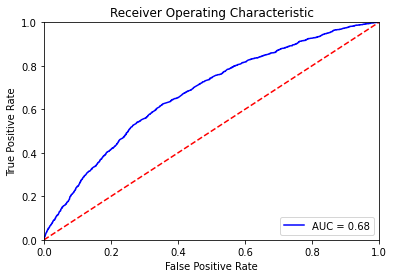

In [ ]:
plotroc(ada_dt,xte,yte)

Accuracy is:  0.7761111111111111
Precision Score is:  0.4925925925925926
Recall Score is:  0.06613625062158131
F1 Score is:  0.1166155195089873


,Name,With All Features,Training Accuracy,Test Accuracy,Precision Score,Recall Score,F1 Score
0,Logistic,Yes,0.697190,0.700222,0.394526,0.637674,0.487462
1,Decision Tree,Yes,0.967429,0.716111,0.381596,0.434891,0.406504
2,SVM,Yes,0.788286,0.785000,0.518975,0.523360,0.521158
3,Random Forest,Yes,0.971905,0.805222,0.594457,0.405070,0.481821
4,Adaboost (Decision tree),Yes,0.820667,0.814222,0.668651,0.334990,0.446358
5,ANN,Yes,0.820667,0.817333,0.684000,0.339960,0.454183
6,Random Forest,No (Selected),0.994095,0.775444,0.493590,0.191447,0.275887
7,Logistic,No (Selected),0.608714,0.613778,0.310184,0.595226,0.407836
8,Decision Tree,No (Selected),0.922190,0.672111,0.304167,0.363003,0.330991
9,SVM,No (Selected),0.616667,0.620778,0.308679,0.562407,0.398590


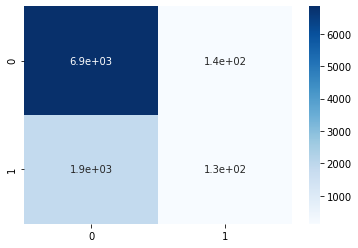

In [ ]:
acc,prec,rec,f1=scores(pred,yte)
MODELS_WTS.loc[idx,'Name']='Adaboost (Decision Tree)'
MODELS_WTS.loc[idx,'With All Features']='No (Selected)'
MODELS_WTS.loc[idx,'Training Accuracy']=trainsc
MODELS_WTS.loc[idx,'Test Accuracy']=acc
MODELS_WTS.loc[idx,'Precision Score']=prec
MODELS_WTS.loc[idx,'Recall Score']=rec
MODELS_WTS.loc[idx,'F1 Score']=f1
idx+=1
MODELS_WTS

In [ ]:
val,counts=np.unique(ytrain,return_counts=True)
print(val[0],counts[0])
print(val[1],counts[1])

0 16376
1 4624


In [ ]:
val,counts=np.unique(ytest,return_counts=True)
print(val[0],counts[0])
print(val[1],counts[1])

0 6988
1 2012


Feature Selection using PCA

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=20)
X=pca.fit_transform(data.iloc[:,1:24])

In [ ]:
X


array([[-1.14804815e+01, -3.79350397e-01,  3.85302169e+00, ...,
        -3.28783002e-03, -3.91622819e-03,  6.51908955e-04],
       [-9.51916364e+00,  1.57595768e+00, -8.54001644e-01, ...,
        -2.05071017e-03, -6.18935579e-04, -2.97228938e-03],
       [-1.50622235e+00,  4.76899301e-01, -1.98956716e-02, ...,
         3.32329154e-03, -3.99552866e-04,  4.68947797e-03],
       ...,
       [ 1.43105712e+00,  3.78085307e+00,  3.41502120e+00, ...,
         1.18257981e-02,  6.49893745e-04,  8.50807242e-05],
       [ 5.53946050e+00,  2.13899752e-01,  9.26268759e-01, ...,
        -5.63287132e-02, -2.10489628e-02, -1.70616200e-02],
       [ 1.05062434e+01,  7.95265102e-01,  3.55532175e-01, ...,
        -3.21359666e-04,  4.53991833e-03, -5.86775543e-03]])

In [ ]:
xtr1,xte1,ytr1,yte1=train_test_split(X,data.iloc[:,24],test_size=0.3)

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=30,class_weight='balanced',min_samples_split=4)
forest.fit(xtr1,ytr1)
trainsc=forest.score(xtr1,ytr1)
pred=forest.predict(xte1)
print(trainsc)

0.9947619047619047


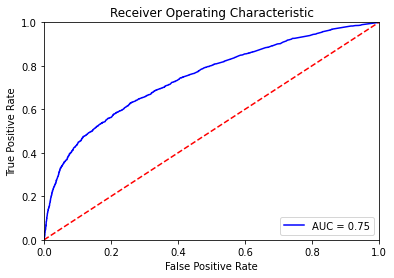

In [ ]:
plotroc(forest,xte1,yte1)

Accuracy is:  0.8128888888888889
Precision Score is:  0.6358543417366946
Recall Score is:  0.3448101265822785
F1 Score is:  0.44714379514116875


,Name,With All Features,Training Accuracy,Test Accuracy,Precision Score,Recall Score,F1 Score
0,Logistic,Yes,0.697190,0.700222,0.394526,0.637674,0.487462
1,Decision Tree,Yes,0.967429,0.716111,0.381596,0.434891,0.406504
2,SVM,Yes,0.788286,0.785000,0.518975,0.523360,0.521158
3,Random Forest,Yes,0.971905,0.805222,0.594457,0.405070,0.481821
4,Adaboost (Decision tree),Yes,0.820667,0.814222,0.668651,0.334990,0.446358
5,ANN,Yes,0.820667,0.817333,0.684000,0.339960,0.454183
6,Random Forest,No (Selected),0.994095,0.775444,0.493590,0.191447,0.275887
7,Logistic,No (Selected),0.608714,0.613778,0.310184,0.595226,0.407836
8,Decision Tree,No (Selected),0.922190,0.672111,0.304167,0.363003,0.330991
9,SVM,No (Selected),0.616667,0.620778,0.308679,0.562407,0.398590


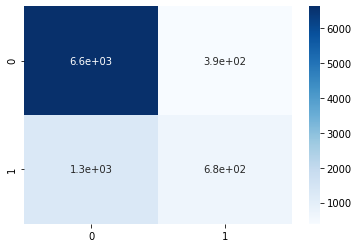

In [ ]:
acc,prec,rec,f1=scores(pred,yte1)
MODELS_WTS.loc[idx,'Name']='Random Forest'
MODELS_WTS.loc[idx,'With All Features']='No (PCA)'
MODELS_WTS.loc[idx,'Training Accuracy']=trainsc
MODELS_WTS.loc[idx,'Test Accuracy']=acc
MODELS_WTS.loc[idx,'Precision Score']=prec
MODELS_WTS.loc[idx,'Recall Score']=rec
MODELS_WTS.loc[idx,'F1 Score']=f1
idx+=1
MODELS_WTS

SVM

In [ ]:
from sklearn.svm import SVC
svm=SVC(class_weight='balanced',C=5,probability=True)
svm.fit(xtr1,ytr1)
trainsc=svm.score(xtr1,ytr1)
print(svm.score(xtr1,ytr1))
pred=svm.predict(xte1)

0.7771428571428571


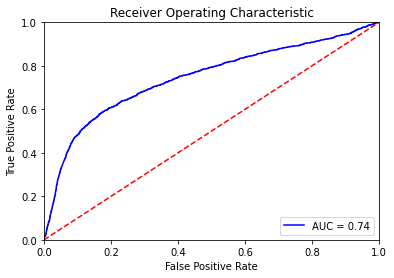

In [ ]:
plotroc(svm,xte1,yte1)

Accuracy is:  0.7734444444444445
Precision Score is:  0.4865546218487395
Recall Score is:  0.5863291139240506
F1 Score is:  0.5318025258323766


,Name,With All Features,Training Accuracy,Test Accuracy,Precision Score,Recall Score,F1 Score
0,Logistic,Yes,0.697190,0.700222,0.394526,0.637674,0.487462
1,Decision Tree,Yes,0.967429,0.716111,0.381596,0.434891,0.406504
2,SVM,Yes,0.788286,0.785000,0.518975,0.523360,0.521158
3,Random Forest,Yes,0.971905,0.805222,0.594457,0.405070,0.481821
4,Adaboost (Decision tree),Yes,0.820667,0.814222,0.668651,0.334990,0.446358
5,ANN,Yes,0.820667,0.817333,0.684000,0.339960,0.454183
6,Random Forest,No (Selected),0.994095,0.775444,0.493590,0.191447,0.275887
7,Logistic,No (Selected),0.608714,0.613778,0.310184,0.595226,0.407836
8,Decision Tree,No (Selected),0.922190,0.672111,0.304167,0.363003,0.330991
9,SVM,No (Selected),0.616667,0.620778,0.308679,0.562407,0.398590


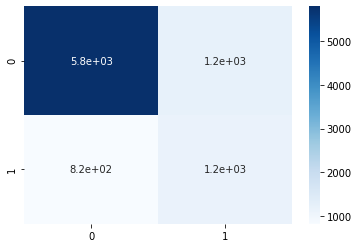

In [ ]:
acc,prec,rec,f1=scores(pred,yte1)
MODELS_WTS.loc[idx,'Name']='SVM'
MODELS_WTS.loc[idx,'With All Features']='No (PCA)'
MODELS_WTS.loc[idx,'Training Accuracy']=trainsc
MODELS_WTS.loc[idx,'Test Accuracy']=acc
MODELS_WTS.loc[idx,'Precision Score']=prec
MODELS_WTS.loc[idx,'Recall Score']=rec
MODELS_WTS.loc[idx,'F1 Score']=f1
idx+=1
MODELS_WTS

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(class_weight='balanced',min_samples_split=5)
dt.fit(xtr1,ytr1)
trainsc=dt.score(xtr1,ytr1)
print(trainsc)
pred=dt.predict(xte1)

0.977


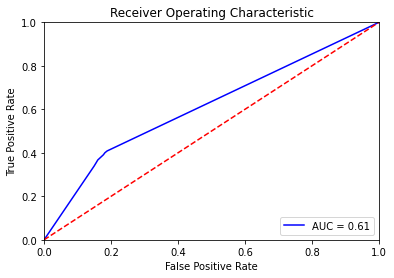

In [ ]:
plotroc(dt,xte1,yte1)

Accuracy is:  0.7232222222222222
Precision Score is:  0.3788732394366197
Recall Score is:  0.40860759493670884
F1 Score is:  0.39317904993909863


,Name,With All Features,Training Accuracy,Test Accuracy,Precision Score,Recall Score,F1 Score
0,Logistic,Yes,0.697190,0.700222,0.394526,0.637674,0.487462
1,Decision Tree,Yes,0.967429,0.716111,0.381596,0.434891,0.406504
2,SVM,Yes,0.788286,0.785000,0.518975,0.523360,0.521158
3,Random Forest,Yes,0.971905,0.805222,0.594457,0.405070,0.481821
4,Adaboost (Decision tree),Yes,0.820667,0.814222,0.668651,0.334990,0.446358
5,ANN,Yes,0.820667,0.817333,0.684000,0.339960,0.454183
6,Random Forest,No (Selected),0.994095,0.775444,0.493590,0.191447,0.275887
7,Logistic,No (Selected),0.608714,0.613778,0.310184,0.595226,0.407836
8,Decision Tree,No (Selected),0.922190,0.672111,0.304167,0.363003,0.330991
9,SVM,No (Selected),0.616667,0.620778,0.308679,0.562407,0.398590


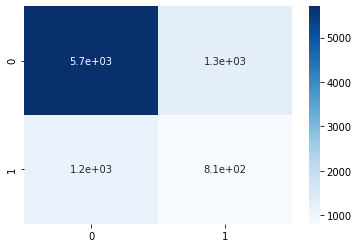

In [ ]:
acc,prec,rec,f1=scores(pred,yte1)
MODELS_WTS.loc[idx,'Name']='Decision Tree'
MODELS_WTS.loc[idx,'With All Features']='No (PCA)'
MODELS_WTS.loc[idx,'Training Accuracy']=trainsc
MODELS_WTS.loc[idx,'Test Accuracy']=acc
MODELS_WTS.loc[idx,'Precision Score']=prec
MODELS_WTS.loc[idx,'Recall Score']=rec
MODELS_WTS.loc[idx,'F1 Score']=f1
idx+=1
MODELS_WTS

Logistic

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(class_weight='balanced',max_iter=10000)
model.fit(xtr1,ytr1)
trainsc=model.score(xtr1,ytr1)
print(model.score(xtr1,ytr1))
pred=model.predict(xte1)

0.6964761904761905


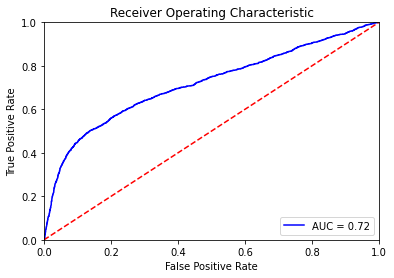

In [ ]:
plotroc(model,xte1,yte1)

Accuracy is:  0.6893333333333334
Precision Score is:  0.37683768376837684
Recall Score is:  0.6359493670886076
F1 Score is:  0.47324792765636775


,Name,With All Features,Training Accuracy,Test Accuracy,Precision Score,Recall Score,F1 Score
0,Logistic,Yes,0.697190,0.700222,0.394526,0.637674,0.487462
1,Decision Tree,Yes,0.967429,0.716111,0.381596,0.434891,0.406504
2,SVM,Yes,0.788286,0.785000,0.518975,0.523360,0.521158
3,Random Forest,Yes,0.971905,0.805222,0.594457,0.405070,0.481821
4,Adaboost (Decision tree),Yes,0.820667,0.814222,0.668651,0.334990,0.446358
5,ANN,Yes,0.820667,0.817333,0.684000,0.339960,0.454183
6,Random Forest,No (Selected),0.994095,0.775444,0.493590,0.191447,0.275887
7,Logistic,No (Selected),0.608714,0.613778,0.310184,0.595226,0.407836
8,Decision Tree,No (Selected),0.922190,0.672111,0.304167,0.363003,0.330991
9,SVM,No (Selected),0.616667,0.620778,0.308679,0.562407,0.398590


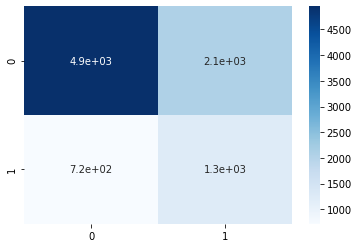

In [ ]:
acc,prec,rec,f1=scores(pred,yte1)
MODELS_WTS.loc[idx,'Name']='Logistic'
MODELS_WTS.loc[idx,'With All Features']='No (PCA)'
MODELS_WTS.loc[idx,'Training Accuracy']=trainsc
MODELS_WTS.loc[idx,'Test Accuracy']=acc
MODELS_WTS.loc[idx,'Precision Score']=prec
MODELS_WTS.loc[idx,'Recall Score']=rec
MODELS_WTS.loc[idx,'F1 Score']=f1
idx+=1
MODELS_WTS

In [ ]:
MODELS_WTS

,Name,With All Features,Training Accuracy,Test Accuracy,Precision Score,Recall Score,F1 Score
0,Logistic,Yes,0.697190,0.700222,0.394526,0.637674,0.487462
1,Decision Tree,Yes,0.967429,0.716111,0.381596,0.434891,0.406504
2,SVM,Yes,0.788286,0.785000,0.518975,0.523360,0.521158
3,Random Forest,Yes,0.971905,0.805222,0.594457,0.405070,0.481821
4,Adaboost (Decision tree),Yes,0.820667,0.814222,0.668651,0.334990,0.446358
5,ANN,Yes,0.820667,0.817333,0.684000,0.339960,0.454183
6,Random Forest,No (Selected),0.994095,0.775444,0.493590,0.191447,0.275887
7,Logistic,No (Selected),0.608714,0.613778,0.310184,0.595226,0.407836
8,Decision Tree,No (Selected),0.922190,0.672111,0.304167,0.363003,0.330991
9,SVM,No (Selected),0.616667,0.620778,0.308679,0.562407,0.398590


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_dt=AdaBoostClassifier()
ada_dt.fit(xtr1,ytr1)
trainsc=ada_dt.score(xtr1,ytr1)
print(ada_dt.score(xtr1,ytr1))
pred=ada_dt.predict(xte1)

0.8138095238095238


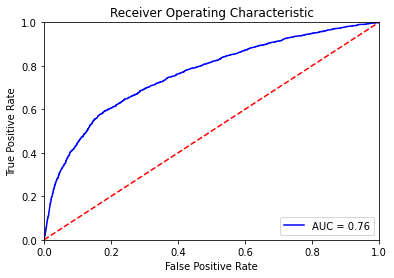

In [ ]:
plotroc(ada_dt,xte1,yte1)

Accuracy is:  0.8102222222222222
Precision Score is:  0.6260623229461756
Recall Score is:  0.33569620253164556
F1 Score is:  0.43704680290046144


,Name,With All Features,Training Accuracy,Test Accuracy,Precision Score,Recall Score,F1 Score
0,Logistic,Yes,0.697190,0.700222,0.394526,0.637674,0.487462
1,Decision Tree,Yes,0.967429,0.716111,0.381596,0.434891,0.406504
2,SVM,Yes,0.788286,0.785000,0.518975,0.523360,0.521158
3,Random Forest,Yes,0.971905,0.805222,0.594457,0.405070,0.481821
4,Adaboost (Decision tree),Yes,0.820667,0.814222,0.668651,0.334990,0.446358
5,ANN,Yes,0.820667,0.817333,0.684000,0.339960,0.454183
6,Random Forest,No (Selected),0.994095,0.775444,0.493590,0.191447,0.275887
7,Logistic,No (Selected),0.608714,0.613778,0.310184,0.595226,0.407836
8,Decision Tree,No (Selected),0.922190,0.672111,0.304167,0.363003,0.330991
9,SVM,No (Selected),0.616667,0.620778,0.308679,0.562407,0.398590


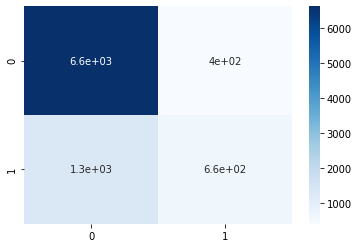

In [ ]:
acc,prec,rec,f1=scores(pred,yte1)
MODELS_WTS.loc[idx,'Name']='Adaboost (Decision Tree)'
MODELS_WTS.loc[idx,'With All Features']='No (PCA)'
MODELS_WTS.loc[idx,'Training Accuracy']=trainsc
MODELS_WTS.loc[idx,'Test Accuracy']=acc
MODELS_WTS.loc[idx,'Precision Score']=prec
MODELS_WTS.loc[idx,'Recall Score']=rec
MODELS_WTS.loc[idx,'F1 Score']=f1
idx+=1
MODELS_WTS

WITHOUT CLASS WEIGHTS

In [ ]:
"""from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain,ytrain)
trainsc=knn.score(xtrain,ytrain)
print(knn.score(xtrain,ytrain))
pred=knn.predict(xtest)"""

'from sklearn.neighbors import KNeighborsClassifier\nknn=KNeighborsClassifier(n_neighbors=3)\nknn.fit(xtrain,ytrain)\ntrainsc=knn.score(xtrain,ytrain)\nprint(knn.score(xtrain,ytrain))\npred=knn.predict(xtest)'

In [ ]:
"""acc,prec,rec,f1=scores(pred,ytest)
MODELS.loc[idx,'Name']='KNN'
MODELS.loc[idx,'With All Features']='Yes'
MODELS.loc[idx,'Training Accuracy']=trainsc
MODELS.loc[idx,'Test Accuracy']=acc
MODELS.loc[idx,'Precision Score']=prec
MODELS.loc[idx,'Recall Score']=rec
MODELS.loc[idx,'F1 Score']=f1
idx+=1
MODELS"""

"acc,prec,rec,f1=scores(pred,ytest)\nMODELS.loc[idx,'Name']='KNN'\nMODELS.loc[idx,'With All Features']='Yes'\nMODELS.loc[idx,'Training Accuracy']=trainsc\nMODELS.loc[idx,'Test Accuracy']=acc\nMODELS.loc[idx,'Precision Score']=prec\nMODELS.loc[idx,'Recall Score']=rec\nMODELS.loc[idx,'F1 Score']=f1\nidx+=1\nMODELS"

In [ ]:
idx

16

In [ ]:
MODELS_WTS

,Name,With All Features,Training Accuracy,Test Accuracy,Precision Score,Recall Score,F1 Score
0,Logistic,Yes,0.697190,0.700222,0.394526,0.637674,0.487462
1,Decision Tree,Yes,0.967429,0.716111,0.381596,0.434891,0.406504
2,SVM,Yes,0.788286,0.785000,0.518975,0.523360,0.521158
3,Random Forest,Yes,0.971905,0.805222,0.594457,0.405070,0.481821
4,Adaboost (Decision tree),Yes,0.820667,0.814222,0.668651,0.334990,0.446358
5,ANN,Yes,0.820667,0.817333,0.684000,0.339960,0.454183
6,Random Forest,No (Selected),0.994095,0.775444,0.493590,0.191447,0.275887
7,Logistic,No (Selected),0.608714,0.613778,0.310184,0.595226,0.407836
8,Decision Tree,No (Selected),0.922190,0.672111,0.304167,0.363003,0.330991
9,SVM,No (Selected),0.616667,0.620778,0.308679,0.562407,0.398590


In [ ]:
all=MODELS_WTS[MODELS_WTS['With All Features']=='Yes']
partial=MODELS_WTS[MODELS_WTS['With All Features']=='No (Selected)']
withpca=MODELS_WTS[MODELS_WTS['With All Features']=='No (PCA)']

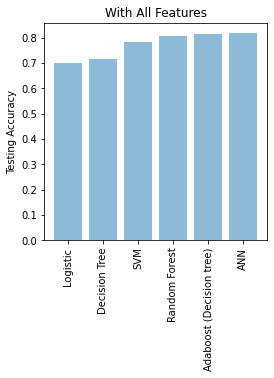

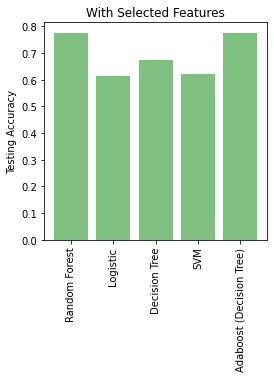

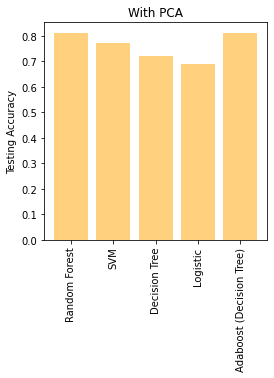

In [ ]:
fig,ax=plt.subplots()
fig.set_size_inches(4,4)
ax.bar(all['Name'],all['Test Accuracy'],alpha=0.5)
ax.set_xticklabels(all['Name'],rotation=90)
ax.set_title("With All Features")
ax.set_ylabel("Testing Accuracy")
plt.show()
fig,ax=plt.subplots()
fig.set_size_inches(4,4)
ax.bar(partial['Name'],partial['Test Accuracy'],alpha=0.5,color='g')
ax.set_xticklabels(partial['Name'],rotation=90)
ax.set_title("With Selected Features")
ax.set_ylabel("Testing Accuracy")
plt.show()
fig,ax=plt.subplots()
fig.set_size_inches(4,4)
ax.bar(withpca['Name'],withpca['Test Accuracy'],alpha=0.5,color='orange')
ax.set_xticklabels(withpca['Name'],rotation=90)
ax.set_title("With PCA")
ax.set_ylabel("Testing Accuracy")
plt.show()

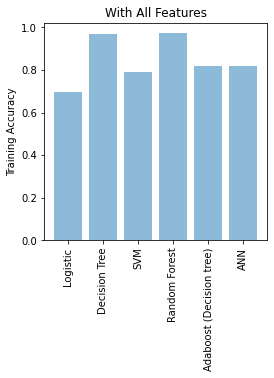

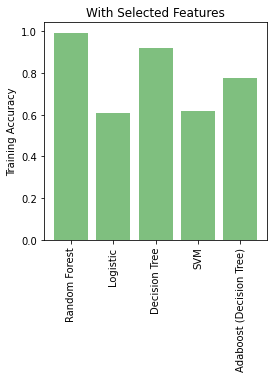

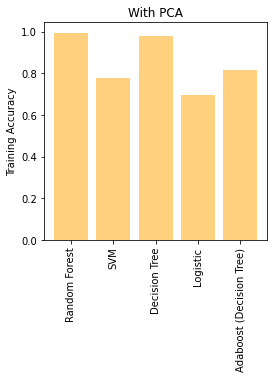

In [ ]:
fig,ax=plt.subplots()
fig.set_size_inches(4,4)
ax.bar(all['Name'],all['Training Accuracy'],alpha=0.5)
ax.set_xticklabels(all['Name'],rotation=90)
ax.set_title("With All Features")
ax.set_ylabel("Training Accuracy")
plt.show()
fig,ax=plt.subplots()
fig.set_size_inches(4,4)
ax.bar(partial['Name'],partial['Training Accuracy'],alpha=0.5,color='g')
ax.set_xticklabels(partial['Name'],rotation=90)
ax.set_title("With Selected Features")
ax.set_ylabel("Training Accuracy")
plt.show()
fig,ax=plt.subplots()
fig.set_size_inches(4,4)
ax.bar(withpca['Name'],withpca['Training Accuracy'],alpha=0.5,color='orange')
ax.set_xticklabels(withpca['Name'],rotation=90)
ax.set_title("With PCA")
ax.set_ylabel("Training Accuracy")
plt.show()

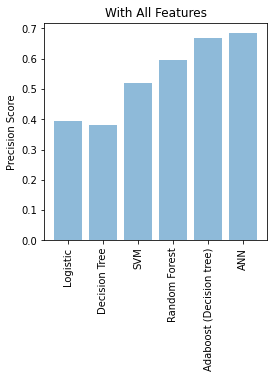

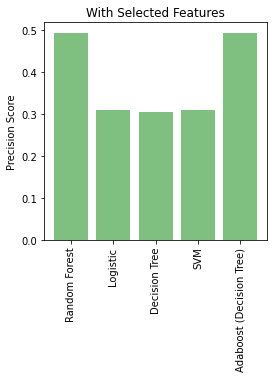

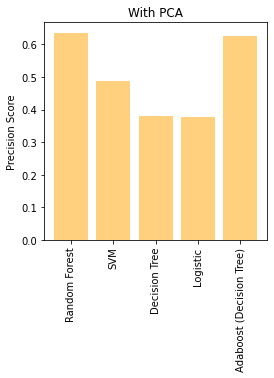

In [ ]:
fig,ax=plt.subplots()
fig.set_size_inches(4,4)
ax.bar(all['Name'],all['Precision Score'],alpha=0.5)
ax.set_xticklabels(all['Name'],rotation=90)
ax.set_title("With All Features")
ax.set_ylabel("Precision Score")
plt.show()
fig,ax=plt.subplots()
fig.set_size_inches(4,4)
ax.bar(partial['Name'],partial['Precision Score'],alpha=0.5,color='g')
ax.set_xticklabels(partial['Name'],rotation=90)
ax.set_title("With Selected Features")
ax.set_ylabel("Precision Score")
plt.show()
fig,ax=plt.subplots()
fig.set_size_inches(4,4)
ax.bar(withpca['Name'],withpca['Precision Score'],alpha=0.5,color='orange')
ax.set_xticklabels(withpca['Name'],rotation=90)
ax.set_title("With PCA")
ax.set_ylabel("Precision Score")
plt.show()

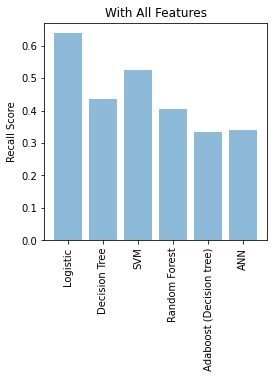

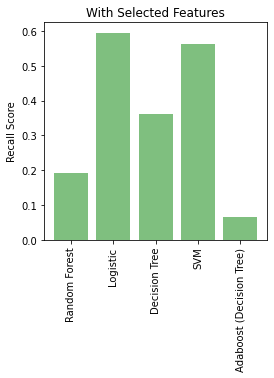

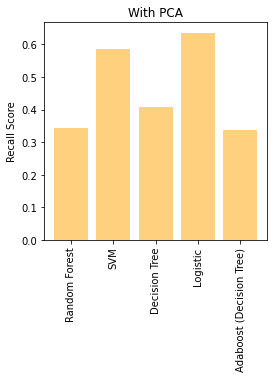

In [ ]:
fig,ax=plt.subplots()
fig.set_size_inches(4,4)
ax.bar(all['Name'],all['Recall Score'],alpha=0.5)
ax.set_xticklabels(all['Name'],rotation=90)
ax.set_title("With All Features")
ax.set_ylabel("Recall Score")
plt.show()
fig,ax=plt.subplots()
fig.set_size_inches(4,4)
ax.bar(partial['Name'],partial['Recall Score'],alpha=0.5,color='g')
ax.set_xticklabels(partial['Name'],rotation=90)
ax.set_title("With Selected Features")
ax.set_ylabel("Recall Score")
plt.show()
fig,ax=plt.subplots()
fig.set_size_inches(4,4)
ax.bar(withpca['Name'],withpca['Recall Score'],alpha=0.5,color='orange')
ax.set_xticklabels(withpca['Name'],rotation=90)
ax.set_title("With PCA")
ax.set_ylabel("Recall Score")
plt.show()

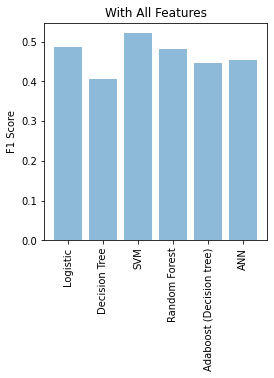

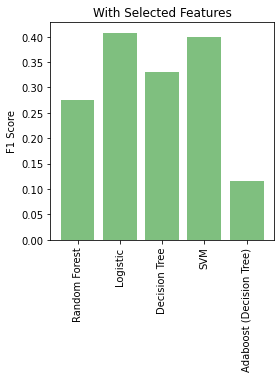

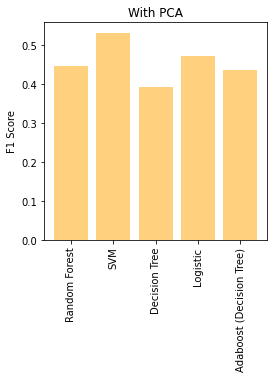

In [ ]:
fig,ax=plt.subplots()
fig.set_size_inches(4,4)
ax.bar(all['Name'],all['F1 Score'],alpha=0.5)
ax.set_xticklabels(all['Name'],rotation=90)
ax.set_title("With All Features")
ax.set_ylabel("F1 Score")

plt.show()
fig,ax=plt.subplots()
fig.set_size_inches(4,4)
ax.bar(partial['Name'],partial['F1 Score'],alpha=0.5,color='g')
ax.set_xticklabels(partial['Name'],rotation=90)
ax.set_title("With Selected Features")
ax.set_ylabel("F1 Score")

plt.show()
fig,ax=plt.subplots()
fig.set_size_inches(4,4)
ax.bar(withpca['Name'],withpca['F1 Score'],alpha=0.5,color='orange')
ax.set_xticklabels(withpca['Name'],rotation=90)
ax.set_title("With PCA")
ax.set_ylabel("F1 Score")

plt.show()